## Tugas 4 Praktikum Machine Learning
Nama  : Athiya Puteri Hidayat <br>
NIM   : 24060121140128 <br>
Lab   : Machine Learning A1

In [ ]:
#Import Library
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### 1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!

In [ ]:
# Melakukan Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

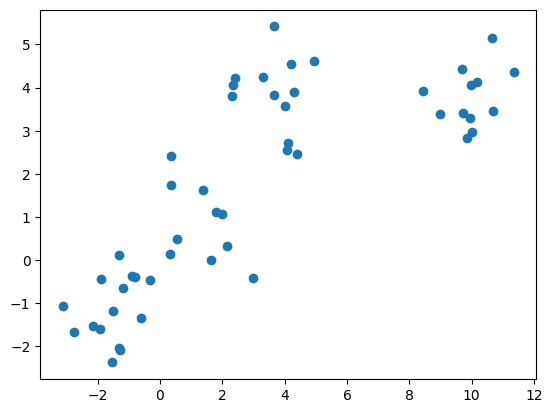

In [ ]:
# Plotting Random Data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

Diatas meupakan visualisasi dataset random data menggunakan scatter plot. etiap titik data menggunkan simbil lingkaran ('o') yang diambild dari kolom 0 dan 1 dai array XI.

Single Linkage

In [ ]:
# Implementasi algoritma Agglomerative Clustering pada dataset yang telah di-generate sebelumnya
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

AgglomerativeClustering dari perpustakaan scikit-learn digunakan untuk melaksanakan proses pengelompokan. Dalam kode ini, suatu model dibuat dengan menentukan parameter jumlah kelompok (n_clusters=4) dan menerapkan metode 'single'. Setelah itu, model disesuaikan dengan kumpulan data yang telah dibuat sebelumnya (X1, y1) menggunakan metode fit. Dengan menggunakan model ini, algoritma melakukan penghubungan hierarki pada titik-titik data, dan setiap titik diberi label kelompok sesuai dengan hasil pengelompokan.

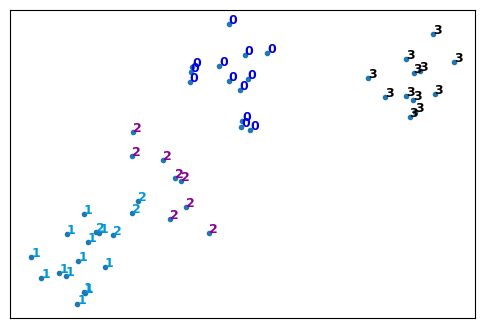

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

Pada kode di atas melaksanakan representasi visual dari hasil pengelompokan Agglomerative Clustering pada kumpulan data yang telah mengalami normalisasi. Setiap titik data diidentifikasi dengan teks yang mencerminkan kelompoknya, dan warna teks mencerminkan label kelompok tersebut. Konfigurasi plot melibatkan normalisasi data, penghapusan penanda sumbu x dan y, dan penampilan plot sebar dari data yang sudah dinormalisasi. Visualisasi ini memberikan gambaran intuitif mengenai cara data dikelompokkan berdasarkan hasil proses pengelompokan.

In [ ]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.06970047 0.27879226 ... 0.61992494 0.25050629 0.83080623]
 [0.06970047 0.         0.21819171 ... 0.65280317 0.26560687 0.84559444]
 [0.27879226 0.21819171 0.         ... 0.85520545 0.46013897 1.01915235]
 ...
 [0.61992494 0.65280317 0.85520545 ... 0.         0.39518933 0.28565663]
 [0.25050629 0.26560687 0.46013897 ... 0.39518933 0.         0.58171167]
 [0.83080623 0.84559444 1.01915235 ... 0.28565663 0.58171167 0.        ]]


Pada kode di atas menghitung dan mencetak matriks jarak antara semua pasangan titik data dalam kumpulan data X1. Matriks ini merepresentasikan jarak Euclidean antara setiap pasangan titik dalam dataset X1. Oleh karena itu, setiap elemen (i, j) dalam matriks mencerminkan jarak antara titik data ke-i dan ke-j dalam ruang fitur. Outputnya memberikan informasi numerik mengenai seberapa dekat atau jauh setiap titik dari titik lain dalam kumpulan data tersebut.

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'single')

<ipython-input-11-4d82e2d71e4f>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'single')


Variabel Z merupakan matriks linkage yang menyimpan data terkait pengelompokan hierarkis selama tahap aglomerasi. Matriks ini menjadi suatu keharusan untuk konstruksi dendrogram yang menggambarkan struktur hierarki dari pengelompokan. Pada fungsi linkage, argumen pertamanya adalah matriks jarak yang merepresentasikan jarak antara setiap pasangan titik data. Argumen kedua, yaitu 'single', menunjukkan penggunaan metode linkage "single-linkage".

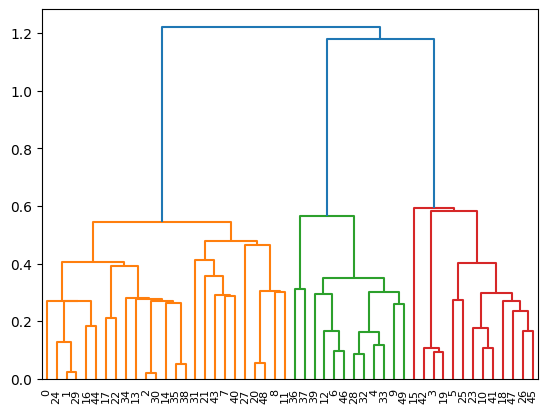

In [ ]:
dendro = hierarchy.dendrogram(Z)

Pada kode di atas memanfaatkan matriks linkage (Z) yang telah dibuat sebelumnya untuk menciptakan serta menampilkan dendrogram dengan menggunakan fungsi dendrogram. Dapat dilihat pada single linkage, jarak terjauh mencapai > 1.2.

Average Linkage

In [ ]:
agglom1 = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom1.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

Kode di atas menerapkan algoritma Agglomerative Clustering pada dataset yang sudah dihasilkan sebelumnya. AgglomerativeClustering dari pustaka scikit-learn dipakai untuk melaksanakan proses pengelompokan. Dalam bagian kode ini, sebuah model dibuat dengan menentukan parameter jumlah kelompok (n_clusters=4) dan menerapkan metode rata-rata. Setelah itu, model disesuaikan dengan dataset yang telah dibuat sebelumnya (X1, y1) melalui metode fit. Dengan menggunakan model ini, algoritma menjalankan penghubungan hierarki pada titik-titik data, dan tiap titik diberikan label kelompok sesuai dengan hasil pengelompokan.

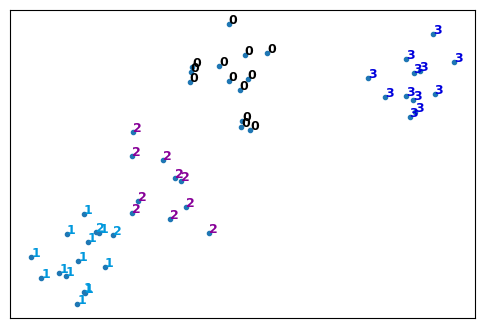

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down
# Or else the data points will be scattered very far apart

# Create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints
for i in range(X1.shape[0]):
  plt.text(X1[i,0], X1[i,1], str(y1[i]),
           color=plt.cm.nipy_spectral(agglom1.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size':9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# Display the plot of the original data before clustering
plt.scatter(X1[:,0], X1[:, 1], marker='.')
plt.show()

Pada kode tersebut melakukan representasi visual dari hasil pengelompokan Agglomerative Clustering pada dataset yang telah di-normalisasi. Setiap titik data diberi tanda dengan teks klaster, dan warna teks mencerminkan label klaster. Penyesuaian plot melibatkan normalisasi data, penghapusan penanda pada sumbu x dan y, dan penyajian plot sebar dari data yang telah mengalami normalisasi. Pemvisualan ini memberikan gambaran yang mudah dipahami tentang bagaimana data dikelompokkan berdasarkan hasil pengelompokan.

In [ ]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.06970047 0.27879226 ... 0.61992494 0.25050629 0.83080623]
 [0.06970047 0.         0.21819171 ... 0.65280317 0.26560687 0.84559444]
 [0.27879226 0.21819171 0.         ... 0.85520545 0.46013897 1.01915235]
 ...
 [0.61992494 0.65280317 0.85520545 ... 0.         0.39518933 0.28565663]
 [0.25050629 0.26560687 0.46013897 ... 0.39518933 0.         0.58171167]
 [0.83080623 0.84559444 1.01915235 ... 0.28565663 0.58171167 0.        ]]


Pada kode di atas menghitung dan mencetak matriks jarak antara setiap pasangan titik data dalam dataset X1. Matriks ini mencerminkan jarak Euclidean antara masing-masing pasangan titik dalam dataset X1. Oleh karena itu, setiap elemen (i, j) dalam matriks mencerminkan jarak antara titik data ke-i dan ke-j dalam ruang fitur. Hasilnya memberikan gambaran numerik tentang seberapa dekat atau jauhnya setiap titik dari titik lain dalam dataset.

In [ ]:
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-16-5a865778cb4f>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


Variabel Y merupakan matriks linkage yang menyimpan data terkait pengelompokan hierarkis selama tahap aglomerasi. Matriks ini diperlukan untuk membentuk dendrogram yang menggambarkan struktur pengelompokan. Pada fungsi linkage, argumen pertamanya adalah matriks jarak yang menunjukkan jarak antara setiap pasangan titik data. Sedangkan argumen kedua, yaitu "average", menandakan penggunaan metode linkage "average-linkage" dalam hierarchical clustering.

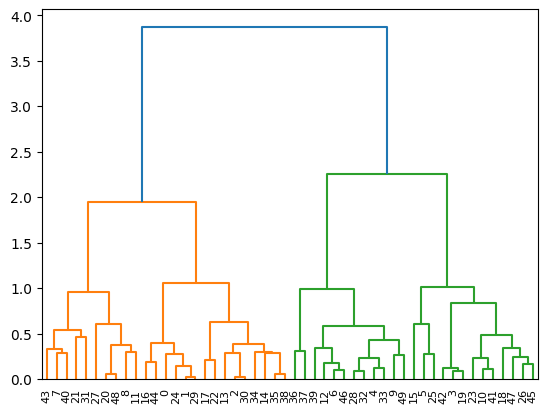

In [ ]:
dendro = hierarchy.dendrogram(Y)

Pada kode ini memanfaatkan matriks linkage (Y) yang telah dibuat sebelumnya untuk menciptakan dan menampilkan dendrogram dengan menggunakan fungsi dendrogram. Dapat dilihat pada average linkage, jarak terjauh mencapai > 4.0. Average link memiliki jarak terjauh dari pada single linkgae. Hal ini dikarenakan average linkage memiliki jarak cluster lebih jauh setelah melakukan clustering pada 2 cluster berbeda.

### 2. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!

In [ ]:
# Import dataset cars_clustering
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2023-12-02 07:00:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2023-12-02 07:00:25 (239 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [ ]:
# Read Dataset
filename = 'cars_clus.csv'

# Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [ ]:
# Data Cleaning
print('Shape of dataset before cleaning: ', pdf.shape)
pdf[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas',
    'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s', 'horsepow', 'wheelbas',
    'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print('Shape of dataset after cleaning: ', pdf.shape)
pdf.head()

Shape of dataset before cleaning:  (159, 16)
Shape of dataset after cleaning:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [ ]:
# Feature Selection
featureset = pdf [['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [ ]:
# Normalization
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Clustering With Scipy

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

<ipython-input-27-4876daf6a6dc>:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng,leng])


Pada kode di atas difungsikan untuk mengkomputasi matriks jarak Euclidean antara setiap pasangan titik data dalam kumpulan data. Proses dimulai dengan mengimport modul scipy dan mendefinisikan variabel 'leng' sebagai jumlah baris dalam 'feature_mtx', yang merupakan matriks fitur. Selanjutnya, matriks 'D' diinisialisasi sebagai matriks nol dengan dimensi [leng, leng]. Setelah itu, terjadi iterasi melalui setiap pasangan titik data dalam dataset dengan menggunakan dua loop bersarang. Pada setiap iterasi, jarak Euclidean antara titik data pada indeks ke-i dan ke-j dihitung dengan menggunakan fungsi 'scipy.spatial.distance.euclidean', dan nilai jarak tersebut disimpan dalam matriks 'D' pada posisi yang sesuai. Melalui pendekatan ini, ketika seluruh iterasi selesai, matriks 'D' berisikan jarak Euclidean antara semua pasangan titik data dalam dataset, memberikan representasi numerik mengenai seberapa jauh atau dekatnya setiap titik terhadap titik lainnya dalam ruang fitur.

Single Linkage

In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'single')

<ipython-input-28-f3a0043c729f>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'single')


Pada kode di atas berfungsi untuk menjalankan agglomerative clustering pada matriks jarak D. Pertama-tama, dilakukan impor modul pylab dan scipy.cluster.hierarchy. Selanjutnya, digunakan fungsi hierarchy.linkage untuk menghitung matriks linkage berdasarkan matriks jarak D. Argumen pertama adalah matriks jarak (D), sementara argumen kedua adalah metode linkage yang diterapkan pada hierarchical clustering. Dalam konteks ini, metode linkage yang digunakan adalah 'single', yang menggunakan jarak minimum antara pasangan titik sebagai metrik jarak antara dua kelompok.
Sebagai hasilnya, matriks linkage Z digunakan untuk menyimpan informasi tentang pengelompokan hierarkis selama proses aglomerasi. Matriks ini diperlukan untuk membentuk dendrogram yang menggambarkan struktur pengelompokan hierarkis.

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

Menetapkan batas jarak maksimum (max_d) dengan nilai 3, fungsi fcluster diterapkan untuk membentuk kelompok. Pembentukan kelompok dilakukan dengan syarat bahwa titik data yang memiliki jarak kurang dari atau sama dengan 3 akan dikelompokkan dalam kelompok yang sama. Sebagai hasilnya, variabel clusters menyimpan label kelompok untuk setiap titik data berdasarkan ambang jarak maksimum yang telah ditentukan. Dengan memvariasikan nilai max_d, kita dapat mengendalikan tingkat ketatnya pembentukan kelompok dan menyesuaikan hasil pengelompokan sesuai dengan kebutuhan analisis.

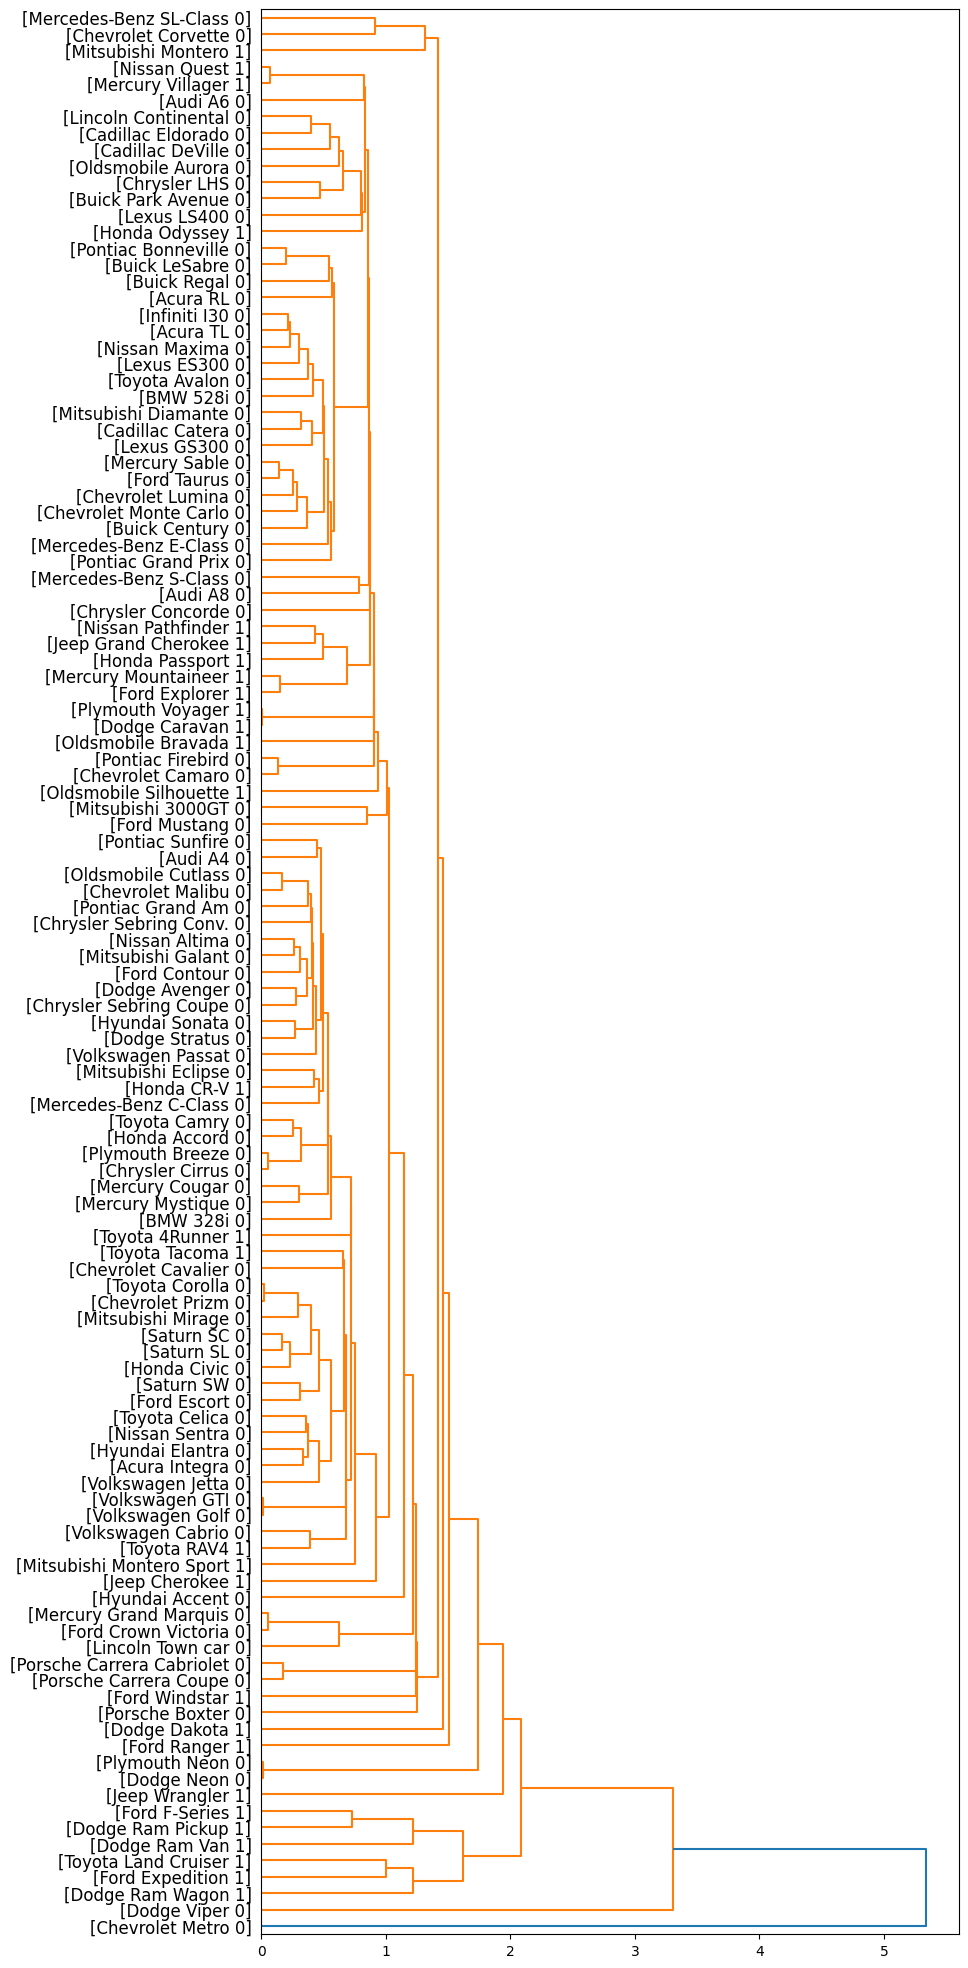

In [ ]:
fig = pylab.figure(figsize=(9,25))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Pada kode di atas berperan dalam pembuatan dan penayangan dendrogram hasil agglomerative clustering dengan menggunakan matriks linkage Z. Dendrogram yang dihasilkan memiliki dimensi 9x25 inci, dan tiap daunnya diberi label yang terbentuk melalui fungsi llf. Fungsi tersebut memanfaatkan informasi dari kolom 'manufact', 'model', dan 'type' pada dataframe df untuk membentuk label yang mencakup merek, model, dan jenis kendaraan. Dendrogram ditampilkan dengan label daun yang terorganisir secara terstruktur, sesuai dengan orientasi yang ditetapkan (ke kanan). Hal ini memberikan gambaran visual tentang pembentukan kelompok dalam hierarki berdasarkan jarak antar data.

Average Linkage

In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'average')

<ipython-input-31-1625b3c83ad2>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'average')


Pada kode di atas berperan dalam menjalankan agglomerative clustering pada matriks jarak D. Pertama, dilakukan impor library pylab dan scipy.cluster.hierarchy. Selanjutnya, digunakan fungsi hierarchy.linkage untuk menghitung matriks linkage berdasarkan matriks jarak D. Argumen pertama adalah matriks jarak (D), sementara argumen kedua adalah metode linkage yang diterapkan pada hierarchical clustering. Dalam hal ini, metode linkage yang digunakan adalah average, di mana jarak antara dua kelompok diukur sebagai rata-rata jarak antara semua pasangan titik data dari kelompok pertama dengan semua titik data dari kelompok kedua.
Sebagai hasilnya, matriks linkage Z digunakan untuk menyimpan informasi tentang pengelompokan hierarkis selama proses aglomerasi. Matriks ini menjadi penting untuk membentuk dendrogram yang mencerminkan struktur pengelompokan hierarkis.

In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

Menetapkan batas batas jarak maksimum (max_d) sebesar 3, fungsi fcluster diaplikasikan untuk membentuk kelompok. Pembentukan kelompok dilakukan dengan kriteria bahwa titik data yang memiliki jarak kurang dari atau sama dengan 3 akan dimasukkan ke dalam kelompok yang sama. Akibatnya, variabel clusters mengandung label kelompok untuk tiap titik data berdasarkan ambang batas jarak maksimum yang telah ditetapkan. Dengan memvariasikan nilai max_d, kita dapat mengatur seberapa ketatnya pembentukan kelompok dan menyesuaikan hasil pengelompokan sesuai dengan kebutuhan analisis.

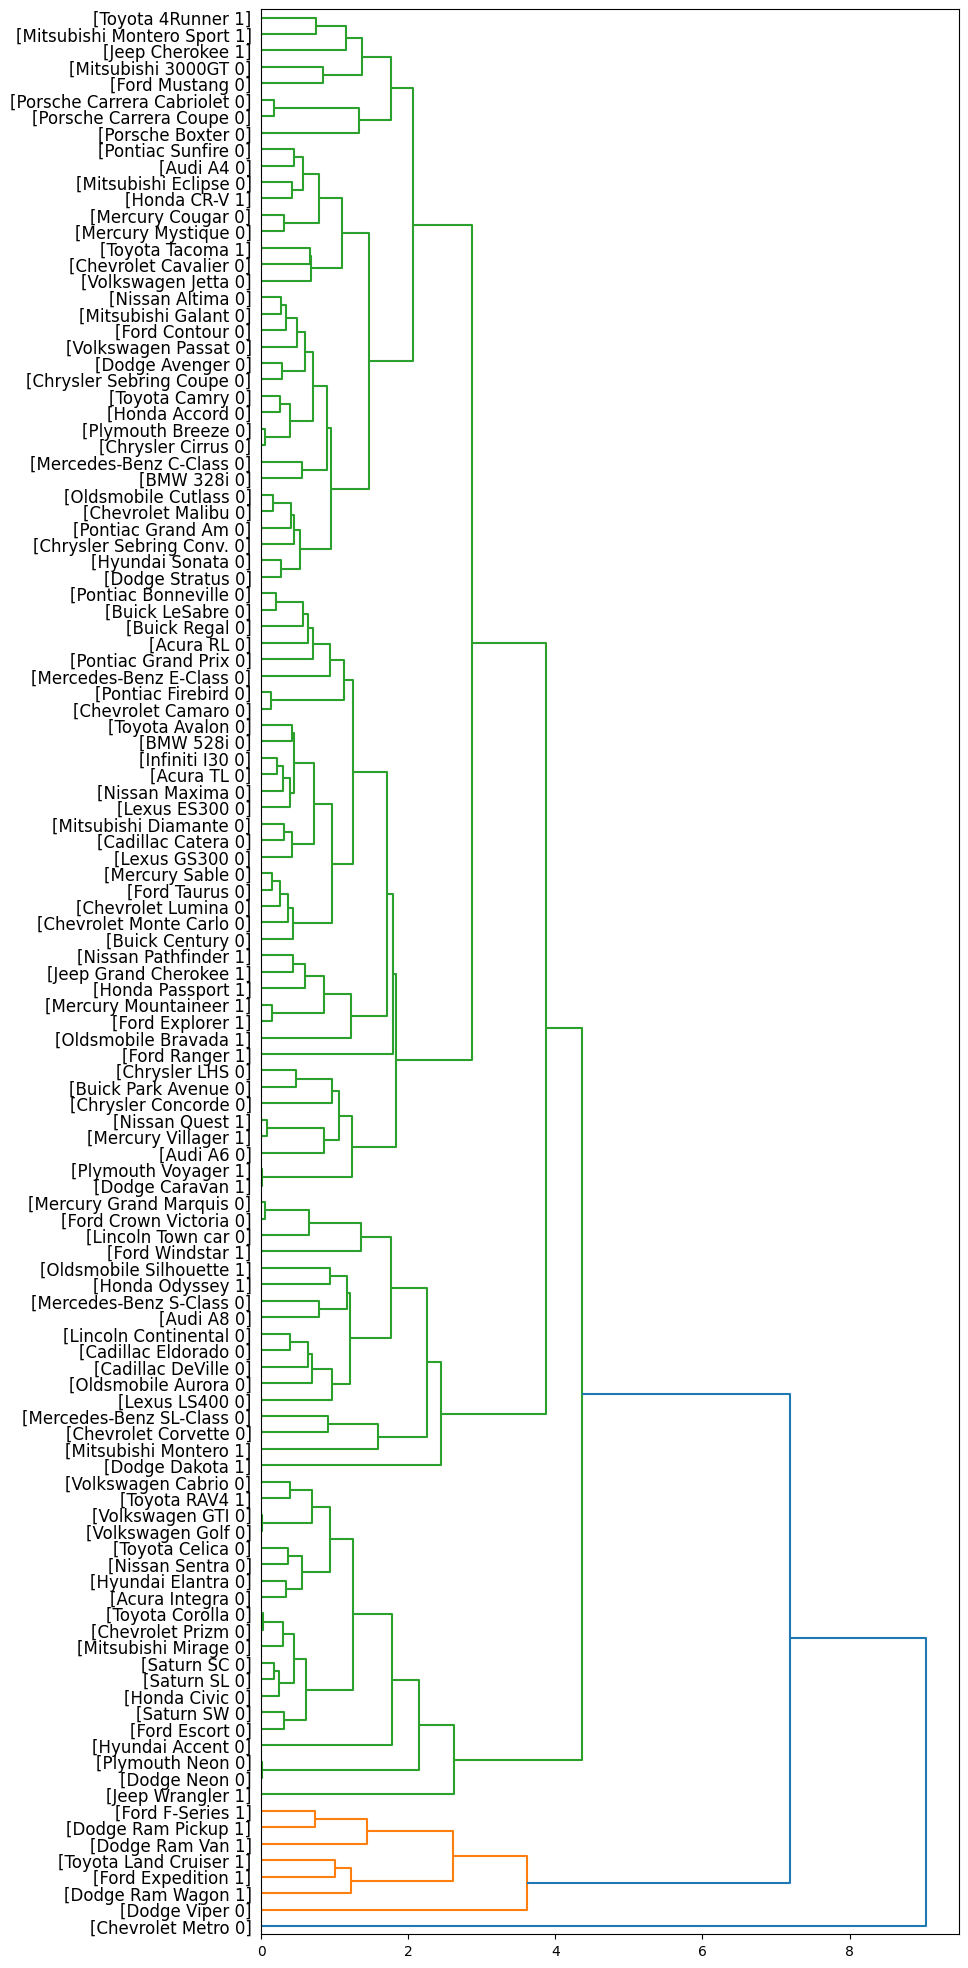

In [ ]:
fig = pylab.figure(figsize=(9,25))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Pada kode di atas berperan dalam menciptakan dan menampilkan dendrogram dari hasil agglomerative clustering dengan menggunakan matriks linkage Z. Dendrogram yang dihasilkan memiliki dimensi 9x25 inci, dan tiap daunnya diberi label yang terbentuk melalui fungsi llf. Fungsi ini memanfaatkan informasi dari kolom 'manufact', 'model', dan 'type' pada dataframe df untuk membentuk label yang mencakup merek, model, dan jenis kendaraan. Dendrogram ditayangkan dengan label daun yang tersusun secara terstruktur, sesuai dengan orientasi yang ditetapkan (ke kanan). Hal ini memberikan gambaran visual tentang pembentukan kelompok dalam hierarki berdasarkan jarak antar data.

Clustering With Scikit Learn

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


Pada kode tersebut memanfaatkan fungsi distance_matrix dari modul scipy.spatial untuk menghitung matriks jarak Euclidean antara setiap pasangan titik data dalam dataset feature_mtx. Hasilnya, matriks dist_matrix, mencerminkan seberapa dekat atau jauhnya setiap titik dari titik lain dalam ruang fitur. Matriks jarak ini menyediakan informasi numerik yang krusial untuk analisis clustering, khususnya dalam konteks metode clustering berbasis jarak seperti hierarchical agglomerative clustering (HAC). Dengan mencetak matriks jarak, kita dapat memahami struktur relatif antara titik data dalam ruang fitur, memudahkan interpretasi hasil clustering.

Single Linkage

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

Pada kode di atas menjalankan metode agglomerative clustering menggunakan AgglomerativeClustering dari pustaka scikit-learn. Dengan menetapkan jumlah cluster sebanyak 6 dan menggunakan metode linkage 'single', objek clustering dibuat dan selanjutnya dilatih pada dataset feature_mtx. Sebagai hasilnya, atribut labels_ dari objek clustering berisi informasi label cluster untuk masing-masing titik data dalam dataset, mencerminkan kelompok mana di mana titik data tersebut telah dikelompokkan melalui proses aglomerasi dengan metode linkage 'single'.

In [ ]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


Pada kode di atas menambahkan kolom baru yang dinamai 'cluster_' ke dalam dataframe df untuk menyimpan label cluster yang telah diberikan kepada setiap titik data berdasarkan hasil agglomerative clustering sebelumnya. Kolom ini diisi dengan label cluster yang sesuai dengan kelompok di mana masing-masing titik data telah dikelompokkan oleh model clustering. Dengan menampilkan lima baris pertama dari dataframe menggunakan df.head(), kita dapat melihat hasil penambahan kolom 'cluster_' yang memberikan informasi tentang kelompok yang telah ditetapkan untuk setiap titik data dalam dataset.

<ipython-input-38-3568676642fc>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

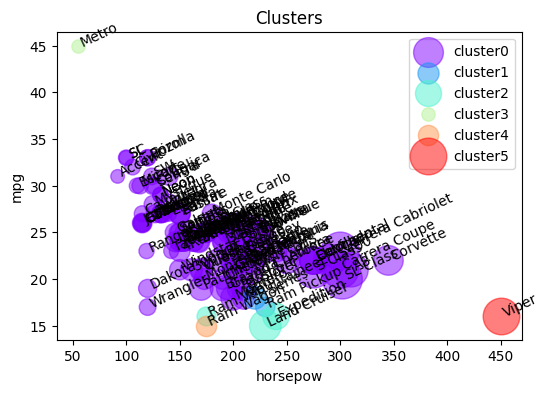

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Kode tersebut dimaksudkan untuk menggambarkan hasil clustering melalui scatter plot menggunakan dua fitur, yaitu horsepow dan mpg. Setiap titik data direpresentasikan pada plot dengan ukuran yang tergantung pada nilai 'price' dan diberi warna yang berbeda untuk membedakan antar cluster. Label cluster dan model kendaraan ditampilkan pada masing-masing titik data. Visualisasi ini memberikan gambaran tentang sebaran titik data dalam ruang fitur dan cara titik-titik tersebut dikelompokkan ke dalam cluster yang berbeda berdasarkan hasil agglomerative clustering yang telah dilakukan sebelumnya.

In [ ]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

Pada kode tersebut memanfaatkan fungsi groupby pada dataframe df untuk mengelompokkan data berdasarkan kolom 'cluster_' dan 'type'. Setelah itu, dilakukan perhitungan jumlah titik data pada setiap kombinasi 'cluster dan jenis kendaraan menggunakan metode count(). Hasilnya adalah statistik yang mengindikasikan seberapa banyak kendaraan dari masing-masing jenis yang termasuk dalam setiap cluster.

In [ ]:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-42-fb63ecec89ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

Pada kode tersebut memanfaatkan fungsi groupby pada dataframe df untuk mengelompokkan data berdasarkan kolom 'cluster_' dan 'type'. Setelah itu, dilakukan perhitungan nilai rata-rata untuk beberapa fitur seperti horsepow, engine_s, mpg, dan price pada setiap kelompok. Akibatnya, dataframe baru yang dinamai agg_cars dibentuk, yang berisi nilai rata-rata dari fitur-fitur tersebut untuk setiap kombinasi cluster dan jenis kendaraan. Dengan menjalankan kode ini, kita dapat memperoleh informasi mengenai karakteristik rata-rata dari masing-masing kelompok kendaraan dalam konteks hasil clustering yang telah dilakukan sebelumnya.

<ipython-input-43-25d76f7a3313>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

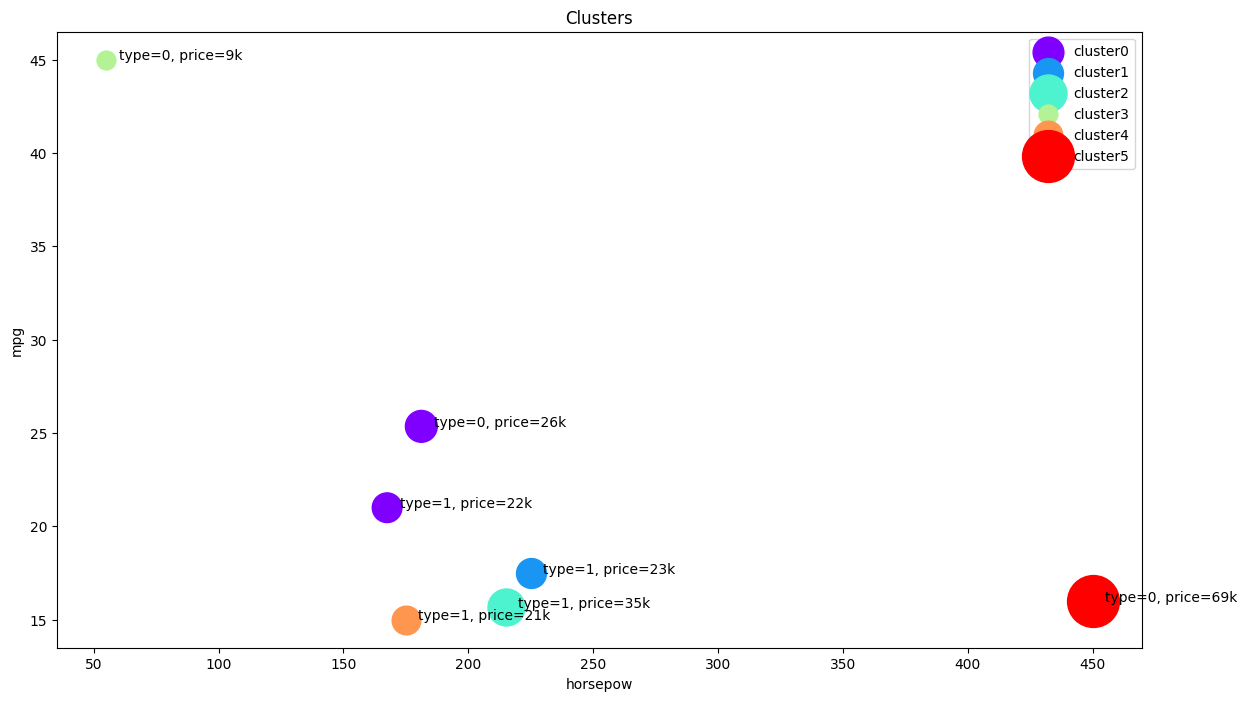

In [ ]:
plt.figure(figsize=(14,8))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Pada kode tersebut dimaksudkan untuk menggambarkan hasil clustering melalui scatter plot dari dataframe agg_cars, yang memuat nilai rata-rata fitur kendaraan untuk setiap cluster dan jenis kendaraan. Masing-masing cluster ditampilkan dengan warna yang berbeda, dan teks tambahan pada setiap titik data menyediakan informasi tentang jenis kendaraan dan harga yang terkait. Visualisasi ini memberikan gambaran yang lebih terperinci mengenai karakteristik rata-rata dan distribusi jenis kendaraan dalam setiap cluster, membantu meningkatkan pemahaman terhadap hasil dari agglomerative clustering yang telah dijalankan sebelumnya.

Average Linkage

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

Pada kode tersebut menjalankan metode agglomerative clustering menggunakan AgglomerativeClustering dari pustaka scikit-learn. Dengan menetapkan jumlah cluster sebanyak 6 dan menggunakan metode linkage 'single', objek clustering dibuat dan selanjutnya dilatih pada dataset feature_mtx. Sebagai hasilnya, atribut labels_ dari objek clustering berisi informasi label cluster untuk setiap titik data dalam dataset, mencerminkan kelompok mana di mana titik data tersebut telah dikelompokkan melalui proses aglomerasi dengan metode linkage 'single'.

In [ ]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,4


Pada kode tersebut menambahkan kolom baru yang disebut 'cluster_' ke dalam dataframe df untuk menyimpan label cluster yang diberikan pada setiap titik data berdasarkan hasil agglomerative clustering sebelumnya. Kolom ini diisi dengan label cluster yang sesuai dengan kelompok di mana masing-masing titik data telah dikelompokkan oleh model clustering. Dengan menampilkan lima baris pertama dari dataframe menggunakan df.head(), kita dapat melihat hasil penambahan kolom 'cluster_' yang memberikan informasi tentang kelompok yang telah ditetapkan untuk setiap titik data dalam dataset.

<ipython-input-47-3568676642fc>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

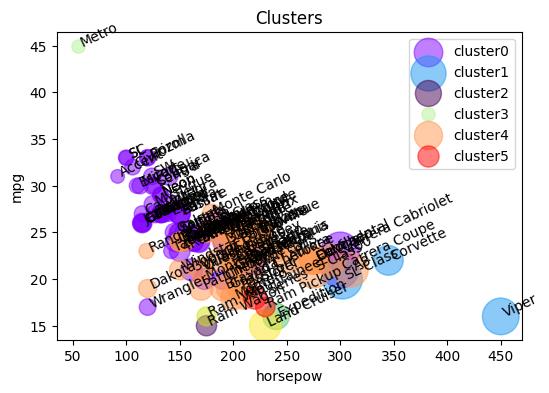

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Pada kode tersebut dimaksudkan untuk menggambarkan hasil clustering melalui scatter plot pada dua fitur, yakni horsepow dan mpg. Tiap titik data dipresentasikan pada plot dengan ukuran yang bergantung pada nilai 'price' dan diberi warna berbeda untuk membedakan antar cluster. Label cluster dan model kendaraan ditampilkan pada masing-masing titik data. Visualisasi ini memberikan gambaran tentang sebaran titik data dalam ruang fitur dan bagaimana titik-titik tersebut dikelompokkan ke dalam cluster yang berbeda berdasarkan hasil agglomerative clustering yang telah dijalankan sebelumnya.

In [ ]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

Pada kode tersebut mengaplikasikan fungsi groupby pada dataframe df untuk mengelompokkan data berdasarkan kolom 'cluster_' dan 'type'. Kemudian, dilakukan perhitungan jumlah titik data pada setiap kombinasi 'cluster dan jenis kendaraan menggunakan metode count(). Hasilnya merupakan statistik yang mencerminkan seberapa banyak kendaraan dari setiap jenis yang tergabung dalam setiap cluster.

In [ ]:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-51-fb63ecec89ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

Pada kode tersebut memanfaatkan fungsi groupby pada dataframe df untuk mengelompokkan data berdasarkan kolom 'cluster_' dan 'type'. Setelah itu, dilakukan perhitungan nilai rata-rata untuk beberapa fitur seperti horsepow, engine_s, mpg, dan price pada setiap kelompok. Akibatnya, dataframe baru yang dinamai agg_cars terbentuk, yang memuat nilai rata-rata dari fitur-fitur tersebut untuk setiap kombinasi cluster dan jenis kendaraan. Dengan menjalankan kode ini, kita dapat memperoleh informasi mengenai karakteristik rata-rata dari setiap kelompok kendaraan dalam konteks hasil clustering yang telah dijalankan sebelumnya.

<ipython-input-52-25d76f7a3313>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

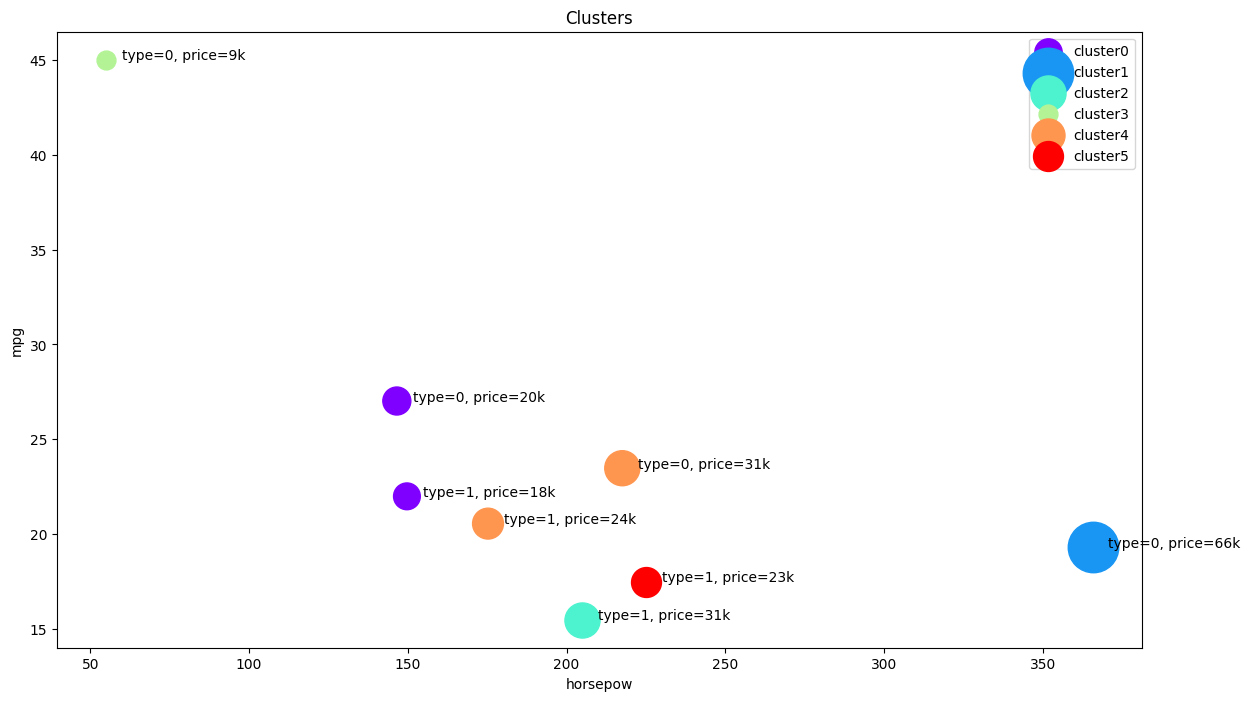

In [ ]:
plt.figure(figsize=(14,8))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Pada kode tersebut digunakan untuk menggambarkan hasil clustering melalui scatter plot dari dataframe agg_cars, yang memuat rata-rata fitur kendaraan untuk setiap cluster dan jenis kendaraan. Masing-masing cluster direpresentasikan dengan warna yang berbeda, dan informasi tambahan pada setiap titik data memberikan detail tentang jenis kendaraan dan harga yang terkait. Visualisasi ini memberikan gambaran lebih terperinci mengenai karakteristik rata-rata dan distribusi jenis kendaraan dalam setiap cluster, membantu meningkatkan pemahaman terhadap hasil dari agglomerative clustering yang telah dijalankan sebelumnya.

# Penjelasan
Hasil clustering yang dihasilkan menggunakan Scipy dan Scikit-Learn menunjukkan kemiripan, walaupun terdapat perbedaan dalam langkah-langkah yang terlibat. Scikit-Learn melibatkan lebih banyak langkah karena harus menghitung jarak, jumlah kasus, dan karakteristik cluster untuk menghasilkan dendrogram atau visualisasi akhir yang lebih rinci. Karakteristik dari setiap cluster, baik melalui single atau average linkage, menunjukkan variasi dalam distribusi jumlah data di masing-masing cluster. Pada single linkage, sebagian besar data tergabung dalam cluster 0, sementara pada average linkage, distribusi data menjadi lebih merata di antara beberapa kluster. Persebaran data di dalam setiap cluster menjadi lebih merata pada average linkage jika dibandingkan dengan single linkage.

### 3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset iris! Jelaskan perbedaannya!

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
pdf = pd.DataFrame(iris.data, columns=iris.feature_names)
pdf['target'] = iris.target

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'classes'])
df.head()

,petal_length,petal_width,sepal_length,sepal_width,classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x = pdf.values
min_max_scaler = MinMaxScaler()
feature_mtx1 = min_max_scaler.fit_transform(x)
feature_mtx1[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667, 0.        ],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667, 0.        ],
       [0.11111111, 0.5       , 0.05084746, 0.04166667, 0.        ],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667, 0.        ],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667, 0.        ]])

In [ ]:
x = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
min_max_scaler = MinMaxScaler()
feature_mtx1 = min_max_scaler.fit_transform(x)
feature_mtx1[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [ ]:
leng = feature_mtx1.shape[0]
A = scipy.zeros([leng, leng])
for i in range(leng):
  for j in range(leng):
    A[i, j] = scipy.spatial.distance.euclidean(feature_mtx1[i], feature_mtx1[j])

<ipython-input-56-d1fff381a6f9>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  A = scipy.zeros([leng, leng])


Clustering Scipy

In [ ]:
# Agglomerative Clustering with scipy library (Scientific Python)
import scipy
from scipy.cluster import hierarchy
leng = feature_mtx. shape[0]
D = scipy.zeros ([leng, leng])

for i in range(leng):
  for j in range(leng):
    D[i,j] - scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
# Calling Single Linkage
iris_single = hierarchy.linkage(D, 'single')
# Calling Average Linkage
iris_average = hierarchy.linkage(D, 'average')
# Calling Compelte Linkage
iris_complete = hierarchy. linkage(D, 'complete')

<ipython-input-57-37576d9b2099>:5: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros ([leng, leng])
<ipython-input-57-37576d9b2099>:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_single = hierarchy.linkage(D, 'single')
<ipython-input-57-37576d9b2099>:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_average = hierarchy.linkage(D, 'average')
<ipython-input-57-37576d9b2099>:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  iris_complete = hierarchy. linkage(D, 'complete')


In [ ]:
def call(id):
  return '[%s]' % (iris.target_names[pdf['target'][id]])

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


Text(0.5, 1.0, 'Single Linkage')

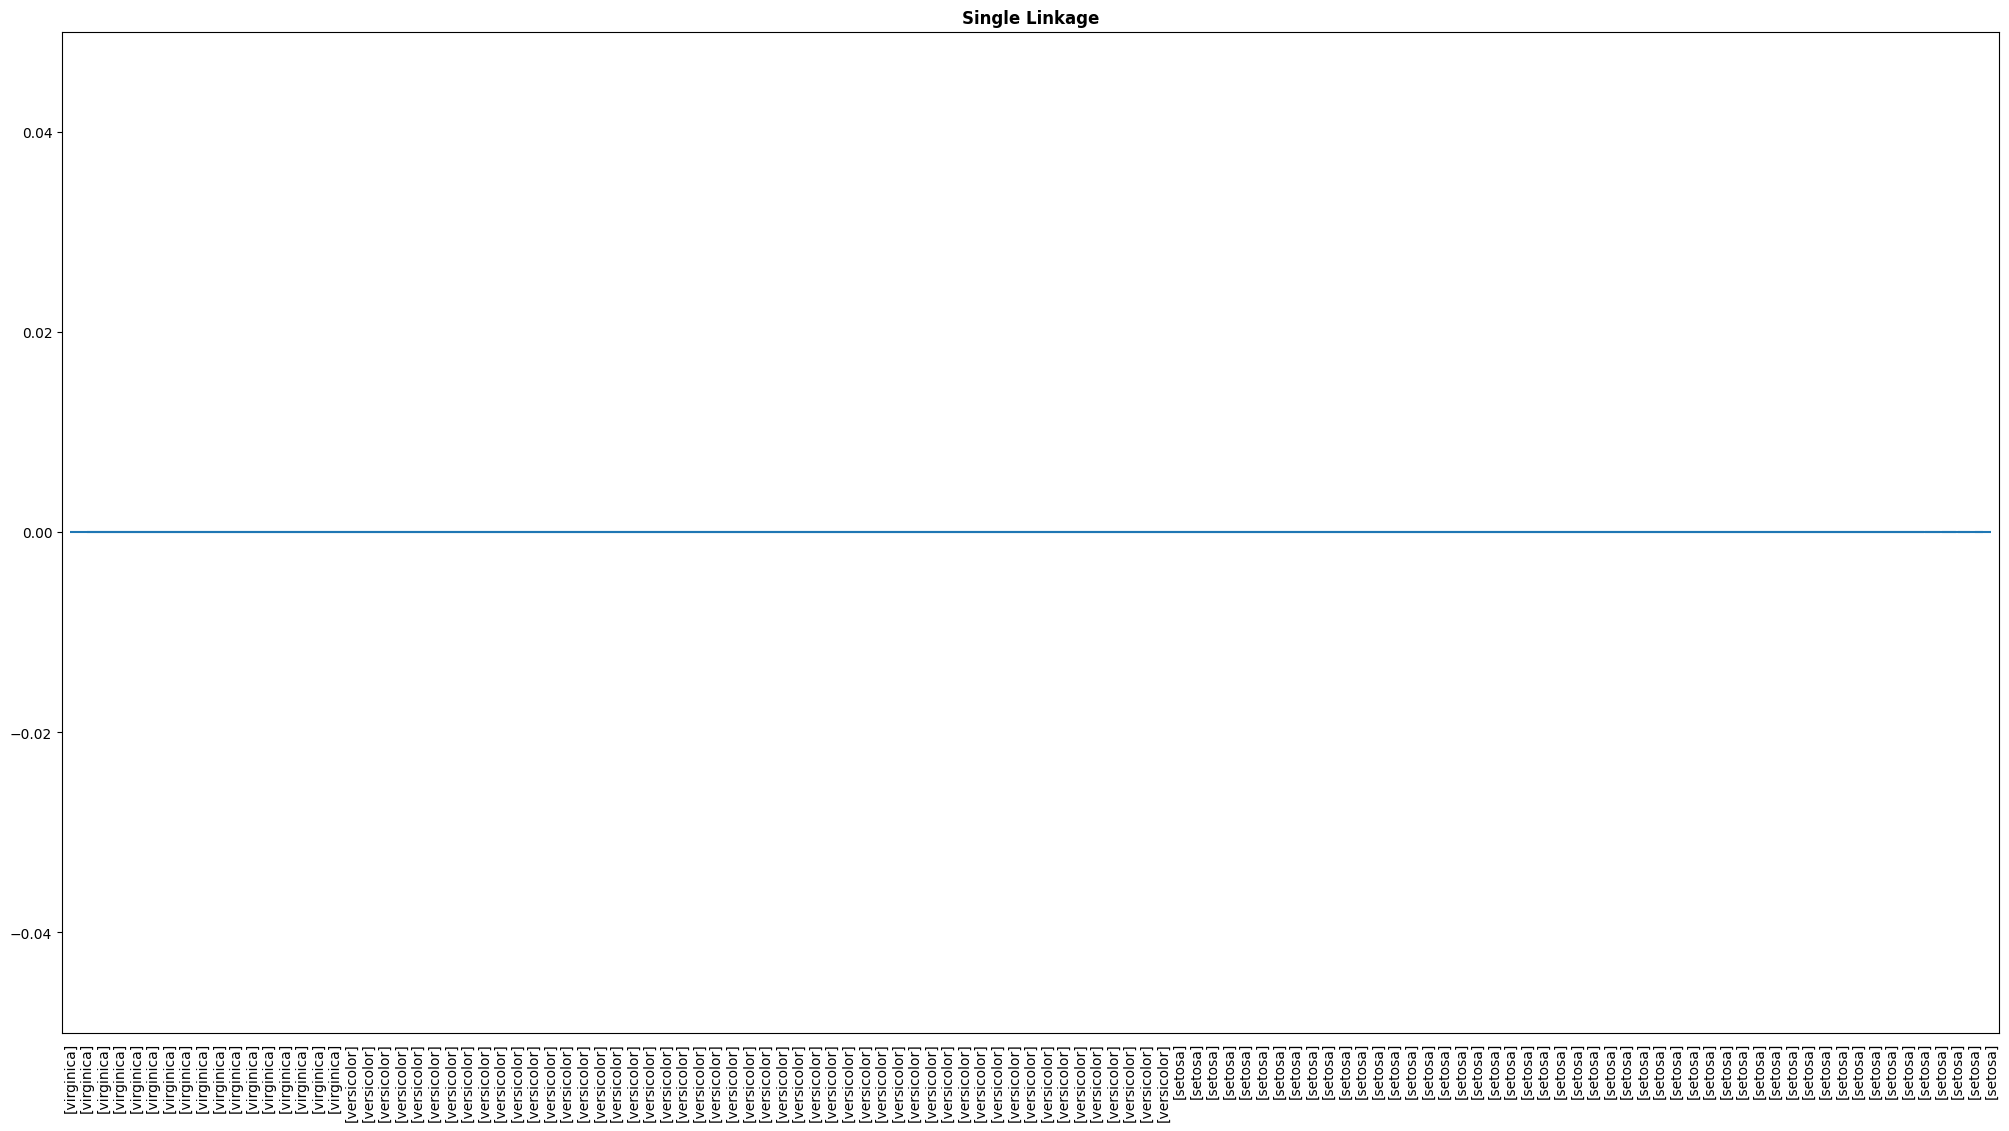

In [ ]:
fig = plt.figure(figsize=(25,13))
dendro1 = hierarchy.dendrogram(iris_single, leaf_label_func=call, leaf_rotation=90, leaf_font_size=10, orientation = 'top')
plt.title("Single Linkage", fontdict={'weight':'bold'})

Single Linkage

In [ ]:
agglom_s = AgglomerativeClustering(n_clusters = 5, linkage = 'single')
agglom_s.fit(feature_mtx1)
agglom_s.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df['cluster_'] = agglom_s.labels_
df.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


<ipython-input-62-bba406c415d8>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

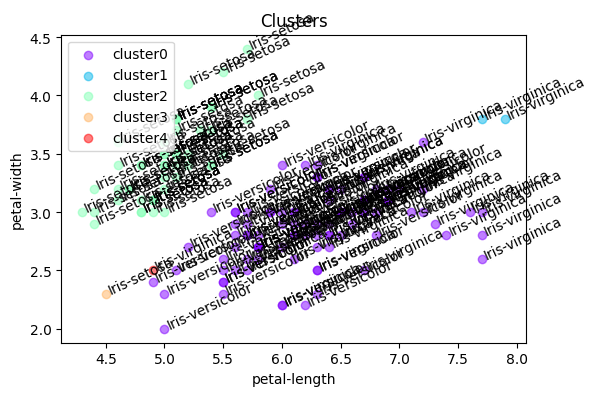

In [ ]:
n_clusters = max(agglom_s.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df[df.cluster_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df.groupby(['cluster_', 'classes'])['cluster_'].count()

cluster_  classes        
0         Iris-versicolor    50
          Iris-virginica     47
1         Iris-virginica      2
2         Iris-setosa        49
3         Iris-setosa         1
4         Iris-virginica      1
Name: cluster_, dtype: int64

In [ ]:
agg_petal = df.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()
agg_petal

<ipython-input-64-9a105a60b85c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal = df.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  sepal_width
cluster_ classes                                                              
0        Iris-versicolor      5.936000     2.770000      4.260000     1.326000
         Iris-virginica       6.572340     2.948936      5.531915     2.029787
1        Iris-virginica       7.800000     3.800000      6.550000     2.100000
2        Iris-setosa          5.016327     3.440816      1.467347     0.242857
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000
4        Iris-virginica       4.900000     2.500000      4.500000     1.700000

<ipython-input-65-00c5a4727209>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

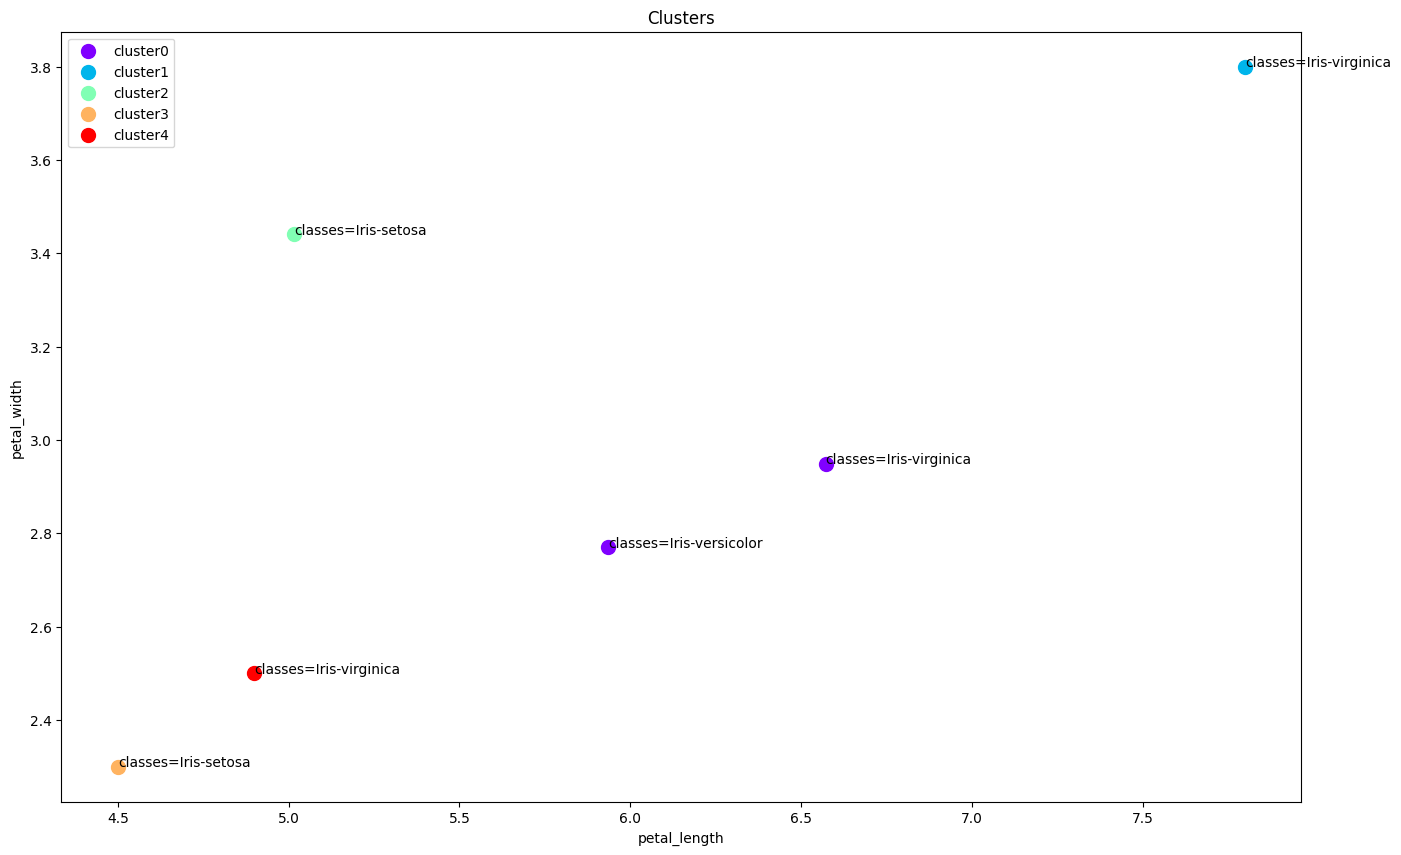

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

Average Linkage

In [ ]:
agglom_a = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
agglom_a.fit(feature_mtx1)
agglom_a.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 0, 4, 0, 0, 0, 0, 2, 0, 4, 0,
       0, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4])

In [ ]:
df['cluster2_'] = agglom_a.labels_
df.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_,cluster2_
0,5.1,3.5,1.4,0.2,Iris-setosa,2,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2,1
2,4.7,3.2,1.3,0.2,Iris-setosa,2,1
3,4.6,3.1,1.5,0.2,Iris-setosa,2,1
4,5.0,3.6,1.4,0.2,Iris-setosa,2,1


<ipython-input-68-f4a050ad5c44>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

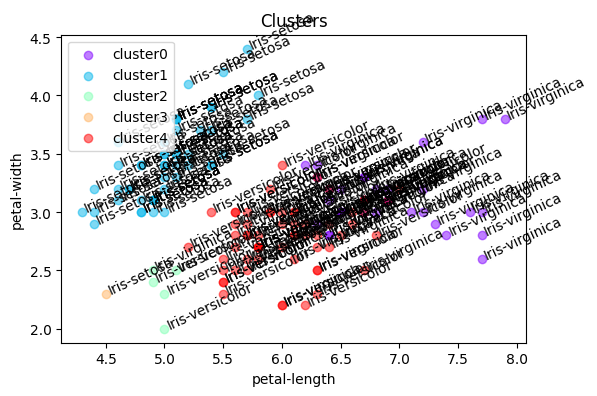

In [ ]:
n_clusters = max(agglom_a.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df[df.cluster2_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df.groupby(['cluster2_', 'classes'])['cluster2_'].count()

cluster2_  classes        
0          Iris-virginica     33
1          Iris-setosa        49
2          Iris-versicolor     4
           Iris-virginica      1
3          Iris-setosa         1
4          Iris-versicolor    46
           Iris-virginica     16
Name: cluster2_, dtype: int64

In [ ]:
agg_petal2 = df.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()
agg_petal2

<ipython-input-70-46158d83ba38>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal2 = df.groupby(['cluster_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  sepal_width
cluster_ classes                                                              
0        Iris-versicolor      5.936000     2.770000      4.260000     1.326000
         Iris-virginica       6.572340     2.948936      5.531915     2.029787
1        Iris-virginica       7.800000     3.800000      6.550000     2.100000
2        Iris-setosa          5.016327     3.440816      1.467347     0.242857
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000
4        Iris-virginica       4.900000     2.500000      4.500000     1.700000

<ipython-input-71-9f7e9ade7cf1>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

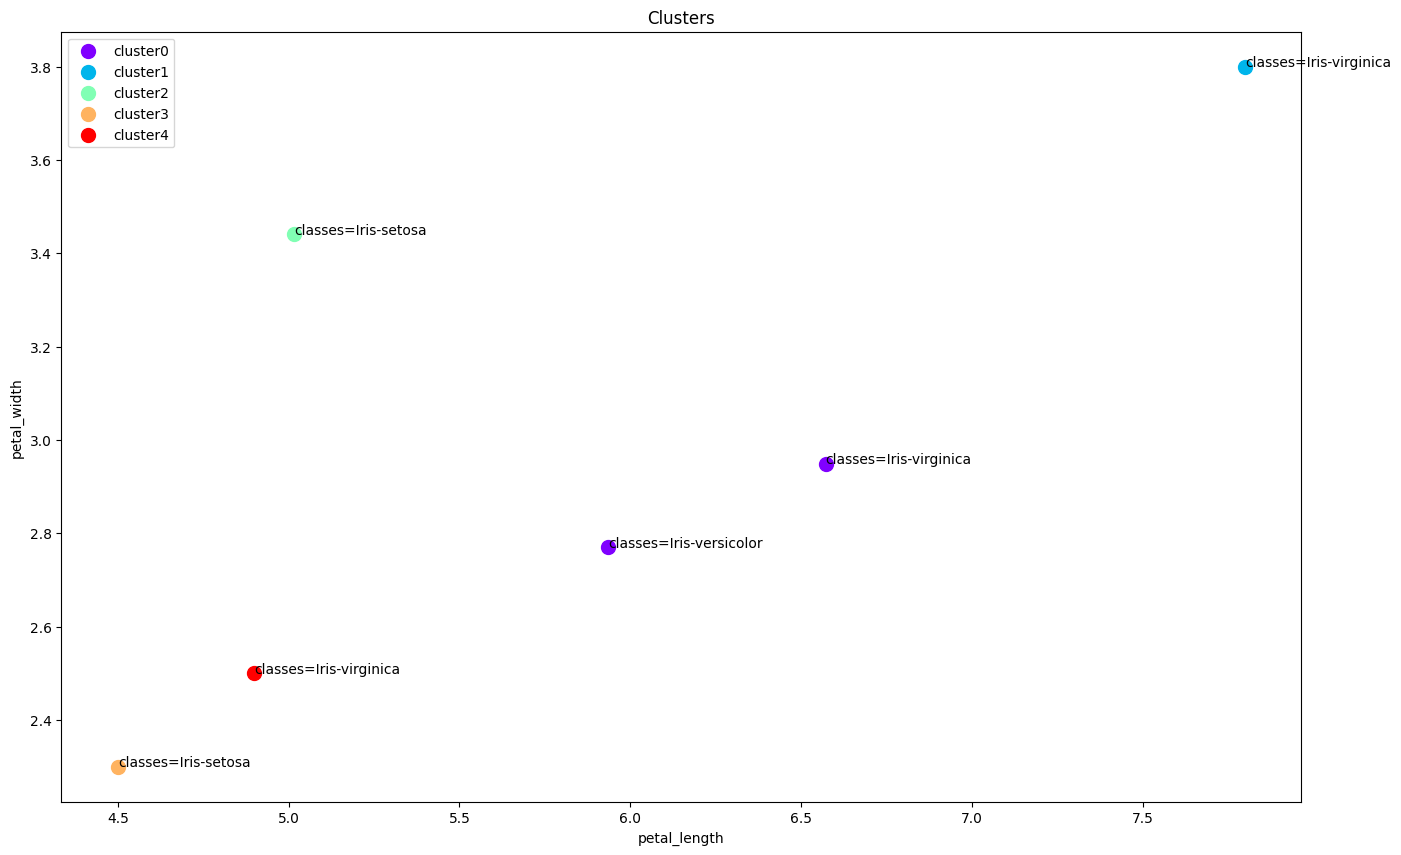

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal2.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

Complete Linkage

In [ ]:
agglom_c = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom_c.fit(feature_mtx1)
agglom_c.labels_

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 0, 1, 0, 0, 0, 0, 4, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
df['cluster3_'] = agglom_c.labels_
df.head()

,petal_length,petal_width,sepal_length,sepal_width,classes,cluster_,cluster2_,cluster3_
0,5.1,3.5,1.4,0.2,Iris-setosa,2,1,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2,1,3
2,4.7,3.2,1.3,0.2,Iris-setosa,2,1,3
3,4.6,3.1,1.5,0.2,Iris-setosa,2,1,3
4,5.0,3.6,1.4,0.2,Iris-setosa,2,1,2


<ipython-input-74-cf90aedaab84>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'petal-width')

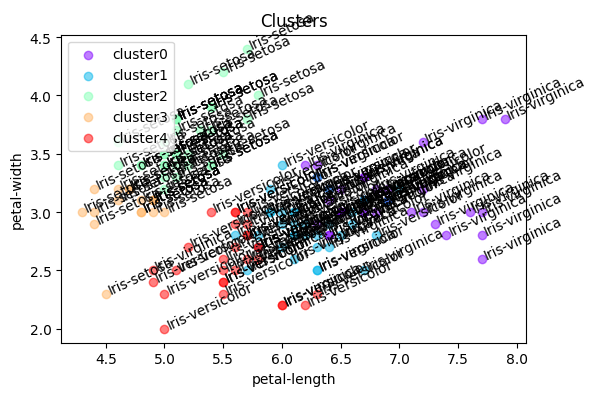

In [ ]:
n_clusters = max(agglom_c.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches
plt.figure(figsize=(6, 4))

for color, label in zip(colors, cluster_labels):
  subset = df[df.cluster3_ == label]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], str(subset['classes'][i]), rotation=25)
  plt.scatter(subset.petal_length, subset.petal_width, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('petal-length')
plt.ylabel('petal-width')

In [ ]:
df.groupby(['cluster3_', 'classes'])['cluster3_'].count()

cluster3_  classes        
0          Iris-versicolor     1
           Iris-virginica     33
1          Iris-versicolor    22
           Iris-virginica     15
2          Iris-setosa        33
3          Iris-setosa        17
4          Iris-versicolor    27
           Iris-virginica      2
Name: cluster3_, dtype: int64

In [ ]:
agg_petal3 = df.groupby(['cluster3_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()
agg_petal3

<ipython-input-76-6d84d4f624c9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_petal3 = df.groupby(['cluster3_', 'classes'])['petal_length', 'petal_width', 'sepal_length', 'sepal_width'].mean()


petal_length  petal_width  sepal_length  \
cluster3_ classes                                                    
0         Iris-versicolor      6.700000     3.000000      5.000000   
          Iris-virginica       6.893939     3.118182      5.806061   
1         Iris-versicolor      6.345455     2.977273      4.586364   
          Iris-virginica       6.066667     2.740000      5.100000   
2         Iris-setosa          5.172727     3.618182      1.487879   
3         Iris-setosa          4.682353     3.029412      1.417647   
4         Iris-versicolor      5.574074     2.592593      3.966667   
          Iris-virginica       5.450000     2.350000      4.750000   

                           sepal_width  
cluster3_ classes                       
0         Iris-versicolor     1.700000  
          Iris-virginica      2.133333  
1         Iris-versicolor     1.450000  
          Iris-virginica      1.846667  
2         Iris-setosa         0.275758  
3         Iris-setosa         0.182353  
4         Iris-versicolor     1.211111  
          Iris-virginica      1.600000

<ipython-input-77-72d4872021ab>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))


Text(0, 0.5, 'petal_width')

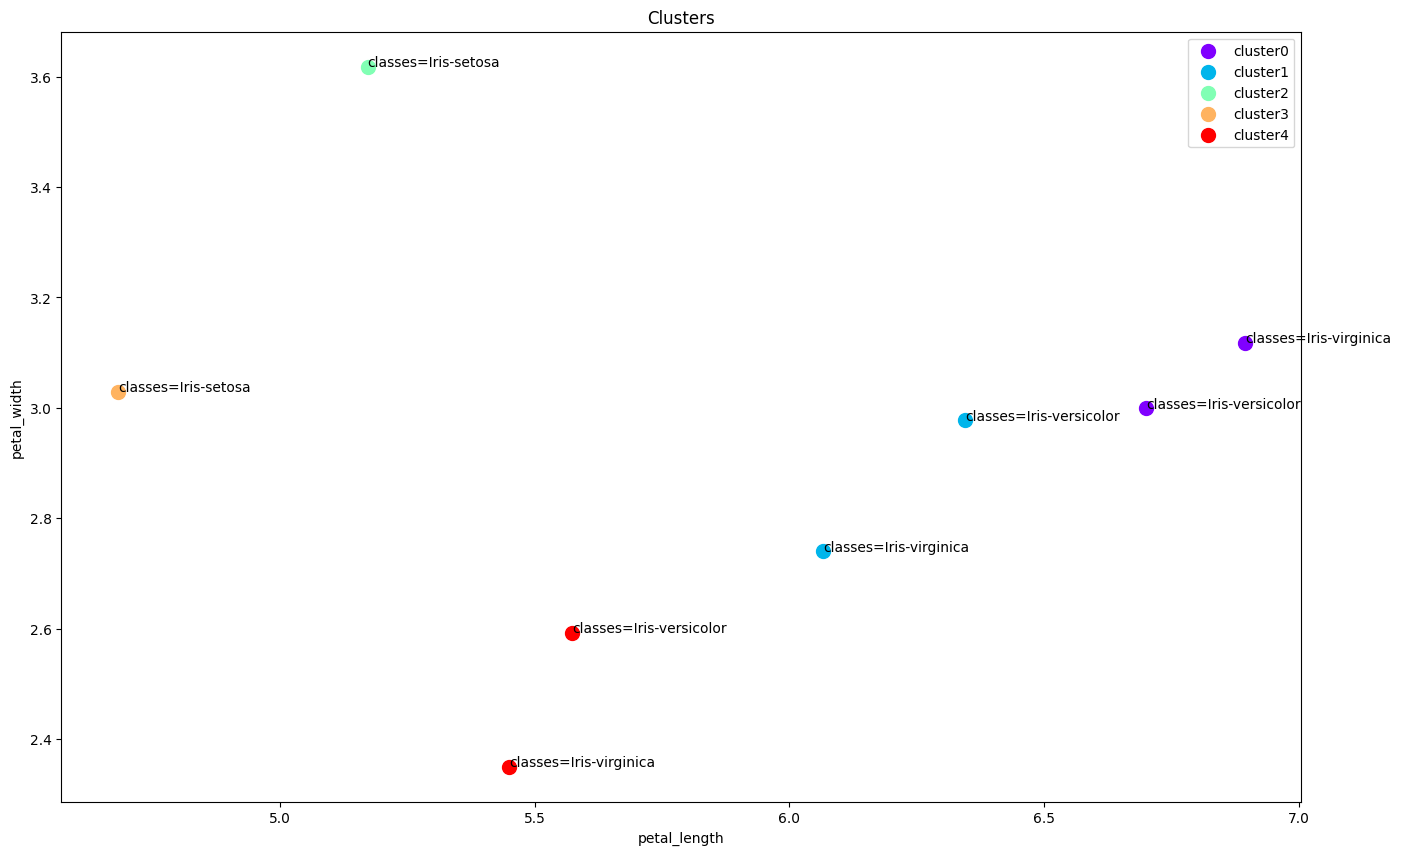

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agg_petal3.loc[(label,),]
  for i in subset.index:
    plt.text(subset.petal_length[i], subset.petal_width[i], 'classes='+str(i))
  plt.scatter(subset.petal_length, subset.petal_width, s=100, c=color, label='cluster'+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

# Penjelasan

Perbedaan dalam proses agglomerative clustering antara pemanfaatan library scipy dan scikit-learn pada dataset iris, secara keseluruhan, menunjukkan kemiripan dengan penerapan pada cars_clustering. Pada scipy, perhitungan Euclidean distance dilakukan secara langsung, diikuti oleh tahap clustering berdasarkan kriteria tertentu. Sebaliknya, scikit-learn menggunakan fungsi distance_matrix untuk menghitung jarak, lalu menjalankan hierarchical clustering.

Dari segi visualisasi, scipy menghasilkan dendrogram dalam bentuk pohon yang lebih mudah dibaca bila dibandingkan dengan scatter plot yang digunakan oleh scikit-learn. Perbedaan dalam pendekatan single, average, dan complete linkage juga dapat diamati, di mana clustering pada average dan complete linkage cenderung lebih stabil dan mudah dipahami dibandingkan dengan single linkage yang menghasilkan banyak cabang.

Dalam implementasi scikit-learn, dendrogram yang terbentuk direpresentasikan dalam bentuk scatter plot. Walaupun perbedaan antara single, average, dan complete linkage tidak terlalu mencolok dalam persebaran data dan area data yang serupa, tetapi terdapat perbedaan dalam penentuan clustering pada single dan average linkage jika dibandingkan dengan complete linkage.

# Kesimpulan
Praktikum ini mengeksplorasi algoritma hierarchical clustering, khususnya dalam agglomerative clustering, dengan menerapkan tiga jenis linkage: single linkage, average linkage, dan complete linkage. Penggunaan tiga dataset berbeda, yaitu random, iris, dan cars_clustering, memberikan variasi untuk memahami karakteristik dan keunggulan masing-masing metode.

Pertama, pada dataset blob, penggunaan single linkage menghasilkan pembentukan cluster yang rentan terhadap efek "chaining," di mana elemen yang berjarak jauh dapat terikat dalam satu cluster. Sebaliknya, average linkage menunjukkan kestabilan lebih tinggi karena mempertimbangkan rata-rata jarak di seluruh cluster, menghasilkan cluster yang lebih padat.

Kedua, pada dataset cars_clustering, metode single linkage dan average linkage memberikan perspektif yang berbeda terhadap klasifikasi mobil berdasarkan fitur tertentu, dengan pemilihan metode linkage memainkan peran kunci dalam pembentukan cluster yang bermakna.

Terakhir, pada dataset iris, ketiga metode linkage memberikan hasil clustering yang memuaskan, namun complete linkage tampak lebih efektif dalam mengelompokkan data dengan variasi yang lebih kompleks. Oleh karena itu, pentingnya memilih metode linkage bergantung pada karakteristik data dan tujuan analisis clustering.